## Importing Libraries

In [2]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Algorithm from library Scikit-Learn

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Configuración matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')


## Loading Data and Preview

In [3]:
df = pd.read_excel("Ingresos_por_persona_dataset.xlsx")

df = df[0:1000]

df.head()

,edad,nivel_educ,raza,sexo,ganancias_capital,perdidas_capital,Horas_semana,Ingresos
0,39,13,White,Male,2174,0,40,<=50K
1,50,13,White,Male,0,0,13,<=50K
2,38,9,White,Male,0,0,40,<=50K
3,53,7,Black,Male,0,0,40,<=50K
4,28,13,Black,Female,0,0,40,<=50K


## Exploratory Analysis to know variables and check for values NA

In [5]:
#Tipos de Variables 

df.info()

#Verificando si existen NA

df.isna().sum().sort_values()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edad               1000 non-null   int64 
 1   nivel_educ         1000 non-null   int64 
 2   raza               1000 non-null   object
 3   sexo               1000 non-null   object
 4   ganancias_capital  1000 non-null   int64 
 5   perdidas_capital   1000 non-null   int64 
 6   Horas_semana       1000 non-null   int64 
 7   Ingresos           1000 non-null   object
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


edad                 0
nivel_educ           0
raza                 0
sexo                 0
ganancias_capital    0
perdidas_capital     0
Horas_semana         0
Ingresos             0
dtype: int64

In [4]:
df.select_dtypes(include=['int64']).describe()

,edad,nivel_educ,ganancias_capital,perdidas_capital,Horas_semana
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.05100,10.084000,588.526000,92.960000,39.876000
std,13.34948,2.548615,2618.537515,412.442337,12.018114
min,17.00000,1.000000,0.000000,0.000000,1.000000
25%,28.00000,9.000000,0.000000,0.000000,40.000000
50%,36.00000,10.000000,0.000000,0.000000,40.000000
75%,46.00000,12.000000,0.000000,0.000000,45.000000
max,90.00000,16.000000,34095.000000,2415.000000,99.000000


In [5]:
# Variables cualitativas (tipo object)

df.select_dtypes(include=['object']).describe()

,raza,sexo,Ingresos
count,1000,1000,1000
unique,5,2,2
top,White,Male,<=50K
freq,847,671,768


<AxesSubplot:xlabel='Ingresos', ylabel='Count'>

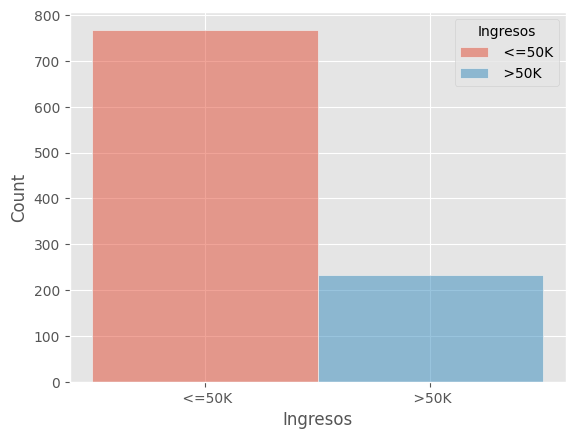

In [6]:
#Distribucion o frecuencia de la variable salidad por cada clase
sns.histplot(x= 'Ingresos' ,hue ='Ingresos', stat = 'count',  data = df)

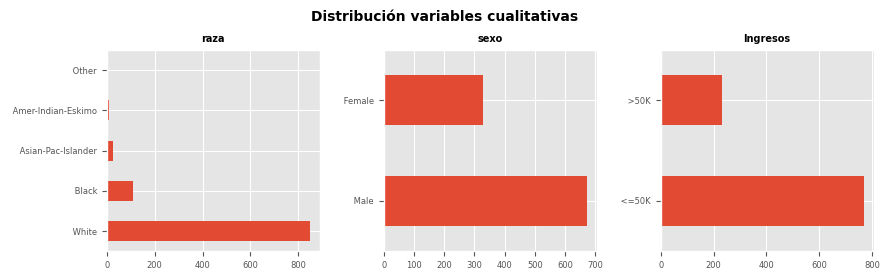

In [7]:
# Gráfico para cada variables cualitativas

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [3,4,5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

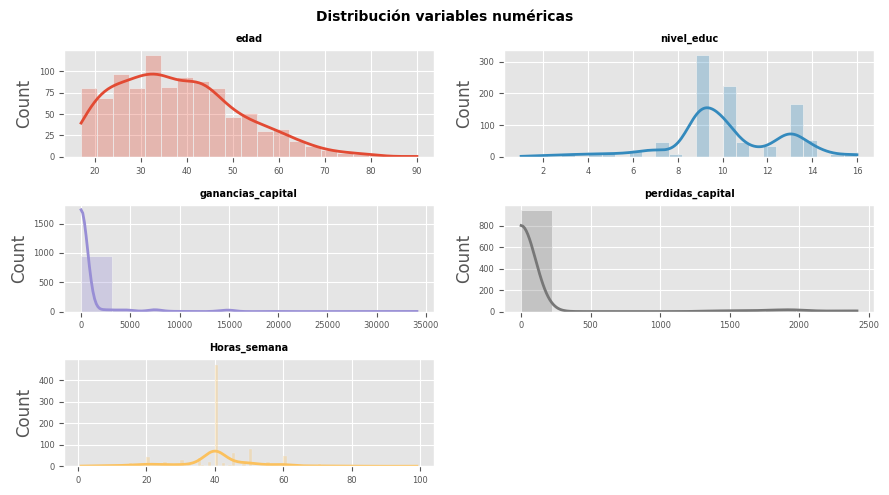

In [8]:
# Gráfico para cada variables numericas

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
fig.delaxes(axes[5])
     
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

## Data processing

In [68]:
# (x) crear un array donde almacenamos todas las variables de entradas (Atributos), en este caso eliminamos 'Ingresos' 
# Las variables numericas las convertimos a numerica con "pd.get_dummies"
x = df.drop('Ingresos', axis=1)
x_input = pd.get_dummies(x)

x_input.head()
#Podemos observar las variables raza y sexo covertidad en numericas mejor llamadas dummies en escala 0,1

,edad,nivel_educ,ganancias_capital,perdidas_capital,Horas_semana,raza_ Amer-Indian-Eskimo,raza_ Asian-Pac-Islander,raza_ Black,raza_ Other,raza_ White,sexo_ Female,sexo_ Male
0,39,13,2174,0,40,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,1,0,0,1,0


In [69]:
# Dividir nuestro conjunto de datos en sus atributos y etiquetas.
# (x) crear un array donde almacenamos todas las variables de entradas (Atributos), en este caso eliminamos 'Ingresos' 
# (y) La variable a clasificar o variables de salida(Etiqueta) esta la almacenamos en otro array.

x_input = x_input.values
y_output = df['Ingresos'].values


## Create Model

In [70]:
# Espeficicamos los diferentes algorimo importados de scikilearn como los modelos de clasificacion con los parametro por defecto ya que probaremos cual tiene mejor rendimiento antes de selecionar uno y optimizarlo.

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN',  KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SV', SVC()))
models.append(('NB',  GaussianNB()))
models.append(('LDA',  LinearDiscriminantAnalysis()))

## Training  and Evaluation of the models

In [71]:
results = []
names = []

for name, model in models:
    skfold = model_selection.StratifiedKFold(n_splits = 10,random_state=42,shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_input, y_output, cv = skfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)
    


LR: 0.821000 (0.034191)
KNN: 0.788000 (0.020396)
TREE: 0.775000 (0.030083)
RF: 0.800000 (0.047749)
SV: 0.801000 (0.021656)
NB: 0.804000 (0.046303)
LDA: 0.816000 (0.037202)


## Select Best model through benchmarking

In [93]:
# selecionamos el SV debido a que tiene buena precision y su desviacion es menor que los demas.

#Model
SVM = SVC()
#Parameters
C_range = [0.001,0.01,0.02,0.03, 0.1, 1,2,3] #np.arange(0,1,0.01) 
gamma_range = np.logspace(-9, 3, 13) #[0.001,0.1,0.02,0.03,0.04,0.05,1,2,3]
#grid_CV
param_grid = {'C':C_range,'gamma': gamma_range }
skfold = model_selection.StratifiedKFold(n_splits = 5,random_state=42,shuffle=True)
SVM_CV = GridSearchCV(SVM, param_grid, cv= skfold)
SVM_CV.fit(x_input, y_output)
print('Accuracy of SVC classifier on Best Parameter set: {:.2f}'+ str(SVM_CV.best_params_))
print('Accuracy of SVC classifier on Optimized set: {:.2f}'.format(SVM_CV.best_score_))




Accuracy of K-NN classifier on Best Parameter set: {:.2f}{'C': 3, 'gamma': 0.01}
Accuracy of K-NN classifier on Optimized set: 0.83


## working on it